In [2]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import seaborn as sns

# NLP Terminologies

* **Text corpus or corpora/Corpus** -  A corpus is a large set of text data that can be in one of the languages like English, French, and so on. The corpus can consist of a single document or a bunch of documents

In some of the tasks like machine translation, we would require a multilingual corpus. For example we might need both the English and French translations of the same document content for developing a machine translation model. For speech tasks, we would also need human voice recordings and the corresponding transcribed corpus

* **Paragraph** - A paragraph is the largest unit of text handled by an NLP task. Paragraph level boundaries by itself may not be much use unless broken down into sentences. Though sometimes the paragraph may be considered as context boundaries. Tokenizers that can split a document into paragraphs are available in some of the Python libraries

* **Sentences**- Sentences are the next level of lexical unit of language data. A sentence encapsulates a complete meaning or thought and context. It is usually extracted from a paragraph based on boundaries determined by punctuations like period. The sentence may also convey opinion or sentiment expressed in it. In general, sentences consists of parts of speech (POS) entities like nouns, verbs, adjectives, and so on. There are tokenizers available to split paragraphs to sentences based on punctuations

* **Phrases and words** - Phrases are a group of consecutive words within a sentence that can convey a specific meaning. For example, in the sentence Tomorrow is going to be a rainy day the part going to be a rainy day expresses a specific thought. Some of the NLP tasks extract key phrases from sentences for search and retrieval applications. The next smallest unit of text is the word

* **N-grams** - A sequence of characters or words forms an N-gram. For example, character unigram consists of a single character, a bigram consists of a sequence of two characters and so on. Similarly word N-grams consists of a sequence of n words. In NLP, N-grams are used as features for tasks like text classification

In [3]:
Apple_tweets = pd.read_csv("Apple_tweets.csv")

In [4]:
Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


In [5]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   1181 non-null   object 
 1   Avg     1181 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


In [6]:
Apple_tweets.shape

(1181, 2)

# 1.Text Lowercase

In [7]:
def text_lowercase(text):
    return text.lower()

In [8]:
Apple_tweets['clean_Tweet'] = Apple_tweets['Tweet'].apply(lambda x: text_lowercase(x))

In [9]:
Apple_tweets.head()

,Tweet,Avg,clean_Tweet
0,"I have to say, Apple has by far the best custo...",2.0,"i have to say, apple has by far the best custo..."
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,ios 7 is so fricking smooth & beautiful!! #tha...
2,LOVE U @APPLE,1.8,love u @apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,"thank you @apple, loving my new iphone 5s!!!!!..."
4,.@apple has the best customer service. In and ...,1.8,.@apple has the best customer service. in and ...


# 2.Remove numbers

In [10]:
# # # # Remove numbers
# # def remove_numbers(text):
# #     result = re.sub(r'\d+', '', text)
# #     return result

import re
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[0-9]',r'',cleaned)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

In [11]:
Apple_tweets['clean_Tweet'] = Apple_tweets['clean_Tweet'].str.replace("[0-9]", " ")

# 3. Remove Punctuation

In [12]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [13]:
# print(string.punctuation)

In [14]:
# Example
input_str = "Hey, did you know that the summer break is coming? Amazing right !! @It's only 5 more days !!"
remove_punctuation(input_str)

'Hey did you know that the summer break is coming Amazing right  Its only 5 more days '

In [15]:
Apple_tweets['clean_Tweet'] = Apple_tweets['clean_Tweet'].apply(lambda x: remove_punctuation(x))

In [16]:
Apple_tweets.head()

,Tweet,Avg,clean_Tweet
0,"I have to say, Apple has by far the best custo...",2.0,i have to say apple has by far the best custom...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,ios is so fricking smooth beautiful thanxap...
2,LOVE U @APPLE,1.8,love u apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,thank you apple loving my new iphone s apple...
4,.@apple has the best customer service. In and ...,1.8,apple has the best customer service in and out...


# 4.Remove Special Characters

In [17]:
# spec_chars = ["!",'"',"#","%","&","'","(",")",
#               "*","+",",","-",".","/",":",";","<",
#               "=",">","?","@","[","\\","]","^","_",
#               "`","{","|","}","~","–",]

# for char in spec_chars:
#     df['title'] = df['title'].str.replace(char, ' ')

In [18]:
# def remove_spc_char(text):
#     text.str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.

# data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))

In [19]:
Apple_tweets['clean_Tweet'] = Apple_tweets['clean_Tweet'].str.replace('[^\w\s]','')

In [20]:
Apple_tweets.head()

,Tweet,Avg,clean_Tweet
0,"I have to say, Apple has by far the best custo...",2.0,i have to say apple has by far the best custom...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,ios is so fricking smooth beautiful thanxap...
2,LOVE U @APPLE,1.8,love u apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,thank you apple loving my new iphone s apple...
4,.@apple has the best customer service. In and ...,1.8,apple has the best customer service in and out...


# 5.Remove whitespaces

In [21]:
# remove whitespace from text
def remove_whitespace(text):
    return  " ".join(text.split())

In [22]:
input_str = "   we don't need   the given questions"
remove_whitespace(input_str)

"we don't need the given questions"

In [23]:
Apple_tweets['clean_Tweet'] = Apple_tweets['clean_Tweet'].apply(lambda x :remove_whitespace(x))

In [24]:
Apple_tweets.head()

,Tweet,Avg,clean_Tweet
0,"I have to say, Apple has by far the best custo...",2.0,i have to say apple has by far the best custom...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,ios is so fricking smooth beautiful thanxapple...
2,LOVE U @APPLE,1.8,love u apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,thank you apple loving my new iphone s apple i...
4,.@apple has the best customer service. In and ...,1.8,apple has the best customer service in and out...


# 6.Remove default Stopwords, Stemming and Lemmatization

In [38]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [40]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anchhabra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anchhabra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anchhabra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Appending new words in stopwords

In [28]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('Aniket')

In [29]:
# print(stopwords)

## Stemming

In [30]:
stemmer = PorterStemmer()
# stem words in the list of tokenised words
def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems
  
text = 'data science uses scientific methods algorithms and many types of processes'
stem_words(text)

['data',
 'scienc',
 'use',
 'scientif',
 'method',
 'algorithm',
 'and',
 'mani',
 'type',
 'of',
 'process']

In [31]:
text = 'data science uses scientific methods algorithms and many types of processes'
word_tokenize(text)

['data',
 'science',
 'uses',
 'scientific',
 'methods',
 'algorithms',
 'and',
 'many',
 'types',
 'of',
 'processes']

## Lemmatization with tokenization

In [42]:
# remove stopwords function
def remove_stopwords(text):
    
    # Stop words
    stop_words = set(stopwords.words("english"))
    
    # Tokenization
    word_tokens = word_tokenize(text)
        
    # Final Text
    filtered_text = [word for word in word_tokens if word not in stop_words]
    
    # provide context i.e. part-of-speech - WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in filtered_text]
    
    return lemmas

In [43]:
example_text = "data science uses scientific methods algorithms and many types of processes"
remove_stopwords(example_text)

['data',
 'science',
 'use',
 'scientific',
 'methods',
 'algorithms',
 'many',
 'type',
 'process']

In [44]:
Apple_tweets['clean_Tweet'] = Apple_tweets['clean_Tweet'].apply(lambda x: remove_stopwords(x))

In [45]:
Apple_tweets.head()

,Tweet,Avg,clean_Tweet
0,"I have to say, Apple has by far the best custo...",2.0,"[say, apple, far, best, customer, care, servic..."
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,"[ios, fricking, smooth, beautiful, thanxapple,..."
2,LOVE U @APPLE,1.8,"[love, u, apple]"
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,"[thank, apple, love, new, iphone, apple, iphon..."
4,.@apple has the best customer service. In and ...,1.8,"[apple, best, customer, service, new, phone, min]"


# 7.Removing Short Words

In [46]:
# Apple_tweets['clean_Tweet'] = Apple_tweets['clean_Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [47]:
# Apple_tweets.head()

# Target Feature Creation

In [48]:
## We are defining a function to convert the 'Avg' column into a column with two classes which will be treated as the
## target variable

def Tweet(x): #naming the function to be 'Tweet' which will take an input 'x'
    if x >= 0: # initialising a conditional statement for the input greater than or equal to 0
        return "Positive" # if the conditional statement is satisfied, the function will return the string 'Positive'
    else: return "Negative" # if the conditional statement is not satisfied, the function will return the string 'Negative'

In [49]:
# Applying the defined function on the column 'Avg' and creating a new column called 'Sentiment'
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

# Dropping the 'Avg' column from the data frame
Apple_tweets.drop("Avg",axis=1,inplace=True)

In [50]:
Apple_tweets

,Tweet,clean_Tweet,Sentiment
0,"I have to say, Apple has by far the best custo...","[say, apple, far, best, customer, care, servic...",Positive
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,"[ios, fricking, smooth, beautiful, thanxapple,...",Positive
2,LOVE U @APPLE,"[love, u, apple]",Positive
3,"Thank you @apple, loving my new iPhone 5S!!!!!...","[thank, apple, love, new, iphone, apple, iphon...",Positive
4,.@apple has the best customer service. In and ...,"[apple, best, customer, service, new, phone, min]",Positive
...,...,...,...
1176,freak @apple,"[freak, apple]",Negative
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,"[cant, freak, see, picture, tl, im, annoy, fre...",Negative
1178,@APPLE YOU freakING COWS freak YOU,"[apple, freak, cow, freak]",Negative
1179,@apple I hate you why is my phone not working ...,"[apple, hate, phone, work, im, go, freak]",Negative


We see that the newly created 'Sentiment' variable has all the positive entries one after the other and all the negative entries after. Since we need to split the data into training and test randomly we have to jumble up the data set.

# 8.Data Analysis from Tweets

* What are the most common words in the entire dataset?
* What are the most common words in the dataset for negative and positive tweets, respectively?
* How many hashtags are there in a tweet?
* Which trends are associated with my dataset?
* Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

# 8a. Understanding the common words used in the tweets: WordCloud

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

In [419]:
Apple_tweets['clean_Tweet']

0       [say, apple, far, best, customer, care, servic...
1       [ios, 7, fricking, smooth, beautiful, thanxapp...
2                                        [love, u, apple]
3       [thank, apple, love, new, iphone, 5s, apple, i...
4       [apple, best, customer, service, new, phone, 1...
                              ...                        
1176                                       [freak, apple]
1177    [cant, freak, see, picture, tl, im, annoy, fre...
1178                           [apple, freak, cow, freak]
1179            [apple, hate, phone, work, im, go, freak]
1180      [agounalakis, thats, nasty, apple, nasty, brat]
Name: clean_Tweet, Length: 1181, dtype: object

In [507]:
Apple_tweets['clean_Tweet_str'] = [' '.join(map(str, l)) for l in Apple_tweets['clean_Tweet']]
Apple_tweets.head()

,Tweet,clean_Tweet,Sentiment,clean_Tweet_str
0,"I have to say, Apple has by far the best custo...","[say, apple, far, best, customer, care, servic...",Positive,say apple far best customer care service ever ...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,"[ios, 7, fricking, smooth, beautiful, thanxapp...",Positive,ios 7 fricking smooth beautiful thanxapple apple
2,LOVE U @APPLE,"[love, u, apple]",Positive,love u apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...","[thank, apple, love, new, iphone, 5s, apple, i...",Positive,thank apple love new iphone 5s apple iphone5s ...
4,.@apple has the best customer service. In and ...,"[apple, best, customer, service, new, phone, 1...",Positive,apple best customer service new phone 10min


# Shuffling the dataset

**Note: We are not using the train-test split function from sklearn and hence the need to jumble the data set**

In [442]:
Apple_tweets=Apple_tweets.sample(frac=1,random_state=3).reset_index().drop("index",axis=1)

#pd.sample()=Return a random sample of items from an axis of object.
#random_state:we used random_state for reproducibility.
#frac=1: is used to generate random sample for whole of the dataset.
#Reset_index: To reset the index as it got shuffled.
#Drop: We used it to drop the privious index

In [529]:
Apple_tweets.head()

,Tweet,clean_Tweet,Sentiment,clean_Tweet_str
0,"I have to say, Apple has by far the best custo...","[say, apple, far, best, customer, care, servic...",Positive,say apple far best customer care service ever ...
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,"[ios, 7, fricking, smooth, beautiful, thanxapp...",Positive,ios fricking smooth beautiful thanxapple apple
2,LOVE U @APPLE,"[love, u, apple]",Positive,love u apple
3,"Thank you @apple, loving my new iPhone 5S!!!!!...","[thank, apple, love, new, iphone, 5s, apple, i...",Positive,thank apple love new iphone s apple iphone s ...
4,.@apple has the best customer service. In and ...,"[apple, best, customer, service, new, phone, 1...",Positive,apple best customer service new phone min


In [530]:
Apple_tweets.shape

(1181, 4)

# Model Building - What is a Bag of Words in NLP?

## Extracting Features from Cleaned Tweets

Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data

A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i)

## Why we use BoW Technique

* ML models work only on numercial data, bow is a numerical representation of text data
* Converting the unstructured data to structured data

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
sentence_1="This burger is tasty.This is a good Food"
sentence_2="The Food is delicious"
sentence_3="The Food is awful"

In [53]:
doc = [sentence_1,sentence_2,sentence_3]
doc

['This burger is tasty.This is a good Food',
 'The Food is delicious',
 'The Food is awful']

In [54]:
# bag-of-words feature matrix
bow = CountVectorizer(stop_words=None)

bow_vec = bow.fit_transform(doc)

In [55]:
# Features
print(bow.get_feature_names())

['awful', 'burger', 'delicious', 'food', 'good', 'is', 'tasty', 'the', 'this']


In [56]:
print(bow_vec)

  (0, 8)	2
  (0, 1)	1
  (0, 5)	2
  (0, 6)	1
  (0, 4)	1
  (0, 3)	1
  (1, 5)	1
  (1, 3)	1
  (1, 7)	1
  (1, 2)	1
  (2, 5)	1
  (2, 3)	1
  (2, 7)	1
  (2, 0)	1


In [57]:
df = pd.DataFrame(bow_vec.todense(),columns=bow.get_feature_names())
df

,awful,burger,delicious,food,good,is,tasty,the,this
0,0,1,0,1,1,2,1,0,2
1,0,0,1,1,0,1,0,1,0
2,1,0,0,1,0,1,0,1,0


Challenges in Bag of Words Methodology: - Refer to excel

## uni-gram model

In [58]:
bow_vectorizer = CountVectorizer(max_df=0.90,
                                 min_df=2,
                                 max_features = 1000, 
                                 stop_words = 'english')

In [533]:
# bag-of-words feature matrix 
bow = bow_vectorizer.fit_transform(Apple_tweets['clean_Tweet_str'])

In [534]:
#create dataframe
bow_apple_tweets = pd.DataFrame(bow.toarray(),columns=bow_vectorizer.get_feature_names())

In [535]:
bow_apple_tweets

,aapl,absolutely,abt,access,accidentally,acciones,account,achieve,act,actually,...,year,years,yes,yesterday,yh,yo,yooo,youre,youtube,za
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [582]:
Apple_tweets.Sentiment.value_counts()

Positive    640
Negative    541
Name: Sentiment, dtype: int64

In [583]:
# df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
Apple_tweets["Sentiment"] = Apple_tweets["Sentiment"].replace({"Positive": 1, "Negative": 0}, inplace=True)

In [589]:
Apple_tweets.Sentiment.value_counts()

1    640
0    541
Name: Sentiment, dtype: int64

In [590]:
y = Apple_tweets.pop('Sentiment')
y.shape

(1181,)

## Train Test Split

In [591]:
from sklearn.model_selection import train_test_split

In [592]:
# splitting data into training and validation set
x_train_bow, x_test_bow, y_train, y_test = train_test_split(bow_apple_tweets, y
                                                          , random_state=42, test_size=0.3)

In [593]:
print("X train shape",x_train_bow.shape)
print("X test shape",x_test_bow.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

X train shape (826, 1000)
X test shape (355, 1000)
y train shape (826,)
y test shape (355,)


## Logistic Regression

In [594]:
from sklearn.linear_model import LogisticRegression

In [595]:
lreg = LogisticRegression()
lreg.fit(x_train_bow, y_train) # training the model

LogisticRegression()

## Accuracy

In [565]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report

In [596]:
model_score = lreg.score(x_train_bow, y_train)  
print(model_score)

0.940677966101695


## Prediction

### Train data

In [597]:
y_train_predict = lreg.predict(x_train_bow)

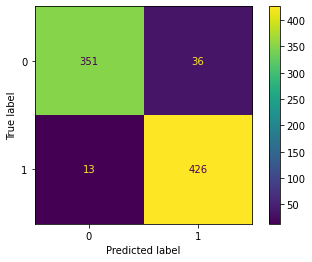

In [600]:
plot_confusion_matrix(lreg,x_train_bow,y_train)
# print(confusion_matrix(y_train, y_train_predict)) 

In [601]:
print(classification_report(y_train, y_train_predict))   

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       387
           1       0.92      0.97      0.95       439

    accuracy                           0.94       826
   macro avg       0.94      0.94      0.94       826
weighted avg       0.94      0.94      0.94       826



### Test data

In [602]:
y_test_predict = lreg.predict(x_test_bow)

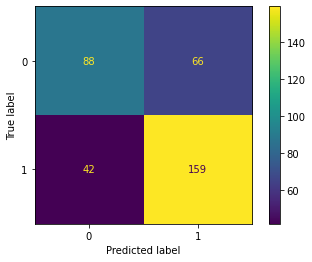

In [603]:
plot_confusion_matrix(lreg,x_test_bow,y_test)

In [604]:
print(classification_report(y_test, y_test_predict))   

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       154
           1       0.71      0.79      0.75       201

    accuracy                           0.70       355
   macro avg       0.69      0.68      0.68       355
weighted avg       0.69      0.70      0.69       355



## Naive Bayes Classifier

In [605]:
from sklearn.naive_bayes import GaussianNB

In [607]:
NB_model = GaussianNB()
NB_model.fit(x_train_bow, y_train)

GaussianNB()

## Accuracy

In [608]:
model_score = NB_model.score(x_train_bow, y_train)  
print(model_score)

0.8619854721549637


## Prediction

### Train data

In [609]:
y_train_predict = NB_model.predict(x_train_bow)

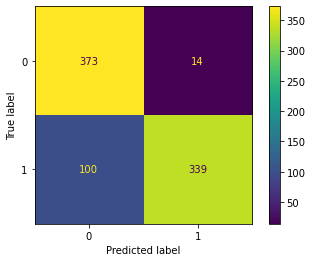

In [610]:
plot_confusion_matrix(NB_model,x_train_bow,y_train)
# print(confusion_matrix(y_train, y_train_predict)) 

In [611]:
print(classification_report(y_train, y_train_predict))   

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       387
           1       0.96      0.77      0.86       439

    accuracy                           0.86       826
   macro avg       0.87      0.87      0.86       826
weighted avg       0.88      0.86      0.86       826



### Test data

In [612]:
y_test_predict = NB_model.predict(x_test_bow)

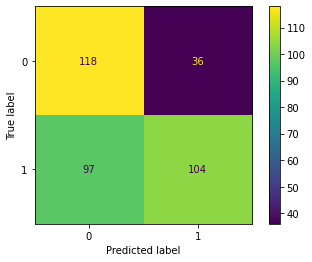

In [613]:
plot_confusion_matrix(NB_model,x_test_bow,y_test)

In [614]:
print(classification_report(y_test, y_test_predict))   

              precision    recall  f1-score   support

           0       0.55      0.77      0.64       154
           1       0.74      0.52      0.61       201

    accuracy                           0.63       355
   macro avg       0.65      0.64      0.62       355
weighted avg       0.66      0.63      0.62       355



## bi-gram model

In [653]:
# Adding a couple of stopwords and recreate the model
all_stopwords = stopwords.words('english')
all_stopwords.append("apple")
all_stopwords.append("http")
all_stopwords.append("bit")
all_stopwords.append("bitly")
all_stopwords.append("bit ly")
all_stopwords.append("dear")
all_stopwords.append("im")
all_stopwords.append("im")
all_stopwords.append("i'm")
all_stopwords.append("please")

In [654]:
bow_vectorizer = CountVectorizer(max_df=0.90,
                                 min_df=2, 
                                 ngram_range=(2, 2), 
                                 max_features=1000, 
                                 stop_words= all_stopwords)

In [655]:
# bag-of-words feature matrix 
bow = bow_vectorizer.fit_transform(Apple_tweets['clean_Tweet_str'])

C:\Users\anchhabra\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ly'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [656]:
#create dataframe
bow_apple_tweets = pd.DataFrame(bow.toarray(),columns=bow_vectorizer.get_feature_names())

In [657]:
bow_apple_tweets

,acciones de,act like,actually good,aim high,amazon refuse,android apples,android vs,andymiah available,announce iphone,announce new,...,xc dk,yall gon,yall need,yeah dont,year french,yes samsung,yh news,yooo freak,yooo iphone,za mishiza
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [658]:
from sklearn.model_selection import train_test_split

In [659]:
# splitting data into training and validation set
x_train_bow, x_test_bow, y_train, y_test = train_test_split(bow_apple_tweets, y
                                                          , random_state=42, test_size=0.3)

In [660]:
print("X train shape",x_train_bow.shape)
print("X test shape",x_test_bow.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

X train shape (826, 558)
X test shape (355, 558)
y train shape (826,)
y test shape (355,)


## Logistic Regression

In [661]:
from sklearn.linear_model import LogisticRegression

In [662]:
lreg = LogisticRegression()
lreg.fit(x_train_bow, y_train) # training the model

LogisticRegression()

## Accuracy

In [663]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report

In [664]:
model_score = lreg.score(x_train_bow, y_train)  
print(model_score)

0.725181598062954


## Prediction

### Train data

In [665]:
y_train_predict = lreg.predict(x_train_bow)

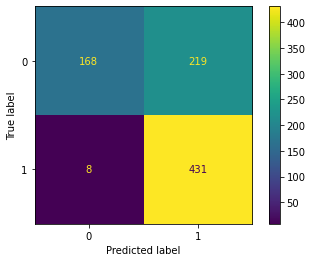

In [666]:
plot_confusion_matrix(lreg,x_train_bow,y_train)
# print(confusion_matrix(y_train, y_train_predict)) 

In [667]:
print(classification_report(y_train, y_train_predict))   

              precision    recall  f1-score   support

           0       0.95      0.43      0.60       387
           1       0.66      0.98      0.79       439

    accuracy                           0.73       826
   macro avg       0.81      0.71      0.69       826
weighted avg       0.80      0.73      0.70       826



### Test data

In [668]:
y_test_predict = lreg.predict(x_test_bow)

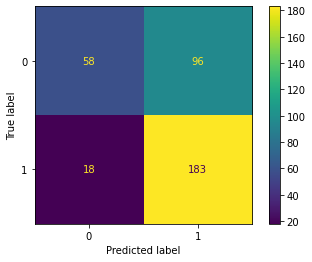

In [669]:
plot_confusion_matrix(lreg,x_test_bow,y_test)

In [670]:
print(classification_report(y_test, y_test_predict))   

              precision    recall  f1-score   support

           0       0.76      0.38      0.50       154
           1       0.66      0.91      0.76       201

    accuracy                           0.68       355
   macro avg       0.71      0.64      0.63       355
weighted avg       0.70      0.68      0.65       355



Similarly Naive Bayes model to be tried

# TF-IDF Approach - term frequency-inverse document frequency

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Important terms related to TF-IDF:

* TF = (Number of times term t appears in a sentence or document)/(Number of terms in the sentence or document)
* IDF=1+log(N/dN)
    * N=Total number of sentences or documents in the dataset.
    * dN=total number of sentences or documents in which nth word occur/containing the word 
* TF-IDF = TF*IDF

The term frequency (TF) of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are other ways to adjust the frequency. For example, by dividing the raw count of instances of a word by either length of the document, or by the raw frequency of the most frequent word in the document.

The inverse document frequency(IDF) of the word across a set of documents. This suggests how common or rare a word is in the entire document set. The closer it is to 0, the more common is the word. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.

If the word is very common and appears in many documents, this number will approach 0. Otherwise, it will approach 1

Multiplying these two numbers results in the TF-IDF score of a word in a document. The higher the score, the more relevant that word is in that particular document

* TF-IDF = TF*IDF

In [683]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
sentence_1="This burger is tasty.This is a good Food"
sentence_2="The Food is delicious"
sentence_3="The Food is awful"

In [684]:
doc = [sentence_1,sentence_2,sentence_3]
doc

['This burger is tasty.This is a good Food',
 'The Food is delicious',
 'The Food is awful']

In [685]:
# bag-of-words feature matrix
tfidf = TfidfVectorizer(stop_words=None)

tfidf_vec = tfidf.fit_transform(doc)

In [686]:
# Features
print(tfidf.get_feature_names())

['awful', 'burger', 'delicious', 'food', 'good', 'is', 'tasty', 'the', 'this']


In [689]:
print(tfidf_vec)

  (0, 3)	0.1997316146971868
  (0, 4)	0.3381750202932272
  (0, 6)	0.3381750202932272
  (0, 5)	0.3994632293943736
  (0, 1)	0.3381750202932272
  (0, 8)	0.6763500405864544
  (1, 2)	0.6628399823470976
  (1, 7)	0.5041068915759233
  (1, 3)	0.39148397136265967
  (1, 5)	0.39148397136265967
  (2, 0)	0.6628399823470976
  (2, 7)	0.5041068915759233
  (2, 3)	0.39148397136265967
  (2, 5)	0.39148397136265967


In [687]:
df = pd.DataFrame(tfidf_vec.todense(),columns=tfidf.get_feature_names())
df

,awful,burger,delicious,food,good,is,tasty,the,this
0,0.00000,0.338175,0.00000,0.199732,0.338175,0.399463,0.338175,0.000000,0.67635
1,0.00000,0.000000,0.66284,0.391484,0.000000,0.391484,0.000000,0.504107,0.00000
2,0.66284,0.000000,0.00000,0.391484,0.000000,0.391484,0.000000,0.504107,0.00000


### Implement on to Apple Tweets dataset

In [690]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words=all_stopwords)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(Apple_tweets['clean_Tweet_str'])

C:\Users\anchhabra\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ly'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [691]:
tfidf

<1181x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6743 stored elements in Compressed Sparse Row format>

In [697]:
# Features
# print(tfidf_vectorizer.get_feature_names())

In [698]:
#create dataframe
tfidf_apple_tweets = pd.DataFrame(tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names())

# pd.DataFrame(processed_features, columns = vectorizer.get_feature_names()).sort_values(by = '5s', ascending=False).head()

In [699]:
tfidf_apple_tweets

,aapl,absolutely,abt,access,accidentally,acciones,account,achieve,act,actually,...,years,yes,yesterday,yet,yh,yo,yooo,youre,youtube,za
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [700]:
from sklearn.model_selection import train_test_split

In [702]:
# splitting data into training and validation set
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(tfidf_apple_tweets, y
                                                          , random_state=42, test_size=0.3)

In [703]:
print("X train shape",x_train_tfidf.shape)
print("X test shape",x_test_tfidf.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

X train shape (826, 1000)
X test shape (355, 1000)
y train shape (826,)
y test shape (355,)


## Logistic Regression

In [704]:
from sklearn.linear_model import LogisticRegression

In [705]:
lreg = LogisticRegression()
lreg.fit(x_train_tfidf, y_train) # training the model

LogisticRegression()

## Accuracy

In [706]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report

In [707]:
model_score = lreg.score(x_train_tfidf, y_train)  
print(model_score)

0.914043583535109


## Prediction

### Train data

In [708]:
y_train_predict = lreg.predict(x_train_tfidf)

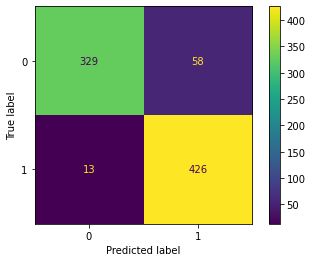

In [709]:
plot_confusion_matrix(lreg,x_train_tfidf,y_train)
# print(confusion_matrix(y_train, y_train_predict)) 

In [710]:
print(classification_report(y_train, y_train_predict))   

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       387
           1       0.88      0.97      0.92       439

    accuracy                           0.91       826
   macro avg       0.92      0.91      0.91       826
weighted avg       0.92      0.91      0.91       826



### Test data

In [711]:
y_test_predict = lreg.predict(x_test_tfidf)

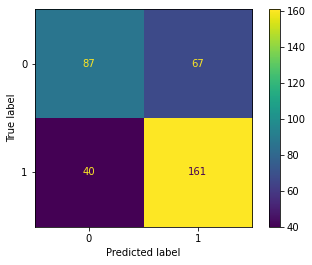

In [712]:
plot_confusion_matrix(lreg,x_test_tfidf,y_test)

In [713]:
print(classification_report(y_test, y_test_predict))   

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       154
           1       0.71      0.80      0.75       201

    accuracy                           0.70       355
   macro avg       0.70      0.68      0.68       355
weighted avg       0.70      0.70      0.69       355



* Similarly Naive Bayes model to be tried
* bi-gram and trigram models also to be tried